In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

<h4 style="color:#00CED1; font-weight:bold">Load data</h4>

In [3]:
data = pd.read_csv('CleanData.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Profit,Shipping Cost,Order Priority,Year,Month,Weekday,IsWeekend,Season,PromotionFlag,DiscountCategory
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,62.15,40.77,High,2014,11,Tuesday,False,Fall,0,No Discount
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,-55.22,57.21,Critical,2014,2,Wednesday,False,Winter,1,Low
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,92.03,57.21,Medium,2014,10,Friday,False,Fall,1,Low
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,-55.22,57.21,Medium,2014,1,Tuesday,False,Winter,1,Low
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,92.03,57.21,Critical,2014,11,Wednesday,False,Fall,0,No Discount


<h3 style="color:#00CED1; font-weight:bold">Exploratory Data Analysis (EDA)</h3>

<h5 style="color:#FFE066; font-weight:bold">Pie Chart → Distribution of Ship Mode</h5>

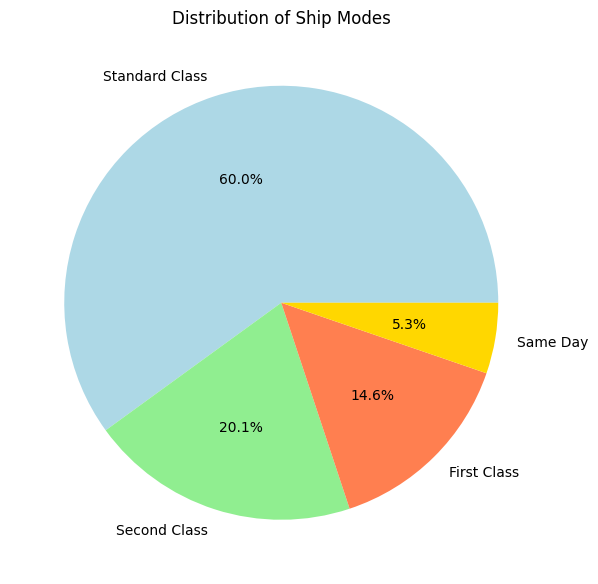

In [4]:
plt.figure(figsize=(7, 12))
data["Ship Mode"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "lightgreen", "coral", "gold"])
plt.title("Distribution of Ship Modes")
plt.ylabel("")  # Hide y-label
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Total Sales by Category</h4>

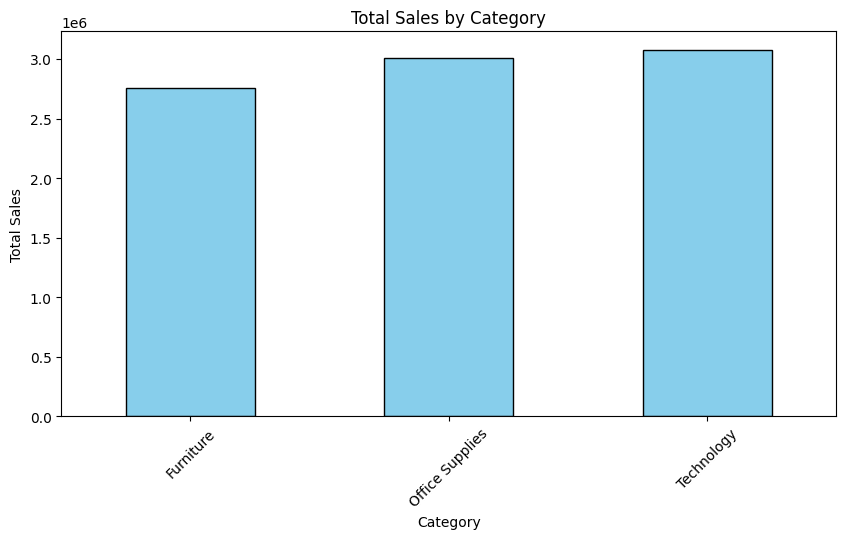

In [5]:
plt.figure(figsize=(10, 5))
data.groupby("Category")["Sales"].sum().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Sales by Category")
plt.ylabel("Total Sales")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Horizontal Bar Chart → Profit per Region</h4>

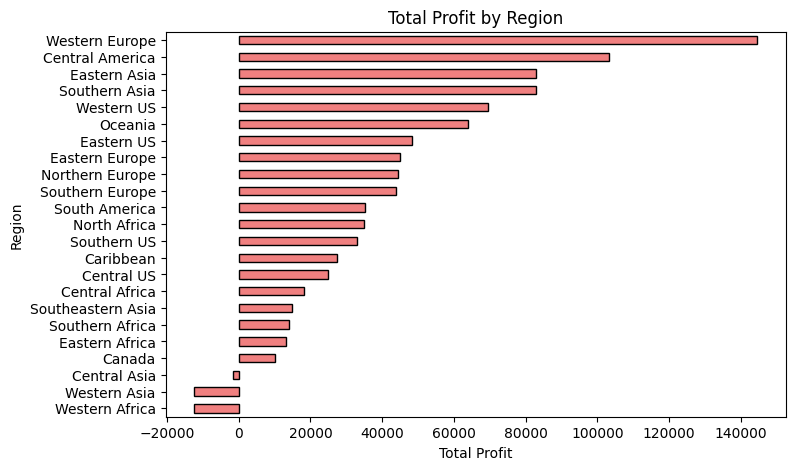

In [6]:
plt.figure(figsize=(8, 5))
data.groupby("Region")["Profit"].sum().sort_values().plot(kind="barh", color="lightcoral", edgecolor="black")
plt.title("Total Profit by Region")
plt.xlabel("Total Profit")
plt.ylabel("Region")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Correlation Heatmap → Relationships between Numerical Variables</h4>

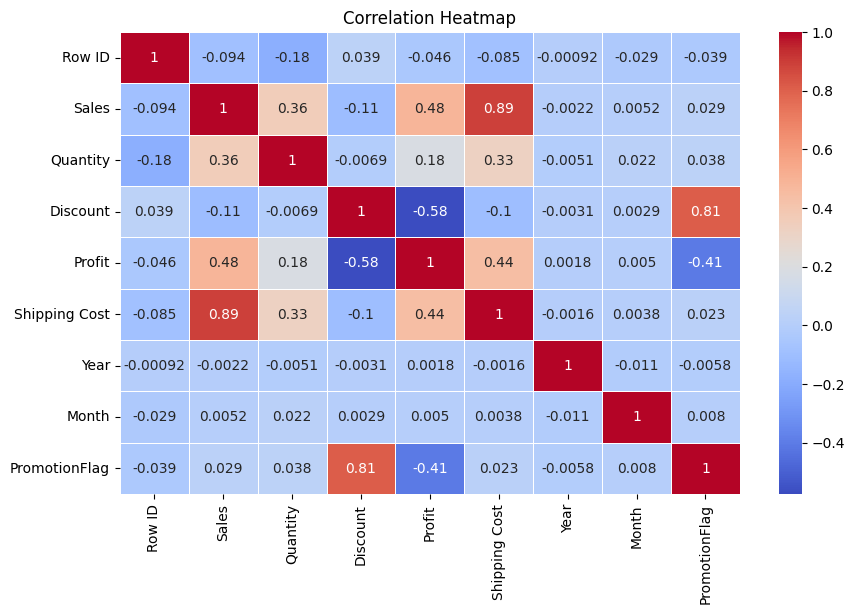

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.select_dtypes(include=["float64", "int64"]).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Scatter Plot → Shows if higher sales lead to higher profit</h4>

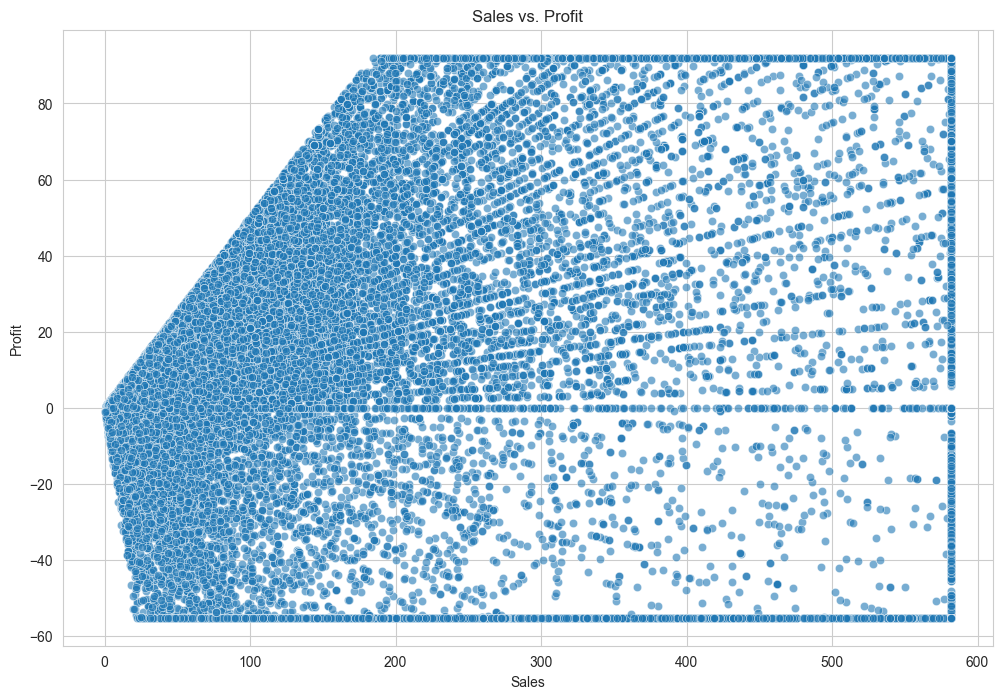

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['Sales'], y=data['Profit'], alpha=0.6)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales vs. Profit")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Compares total sales across product categories</h4>

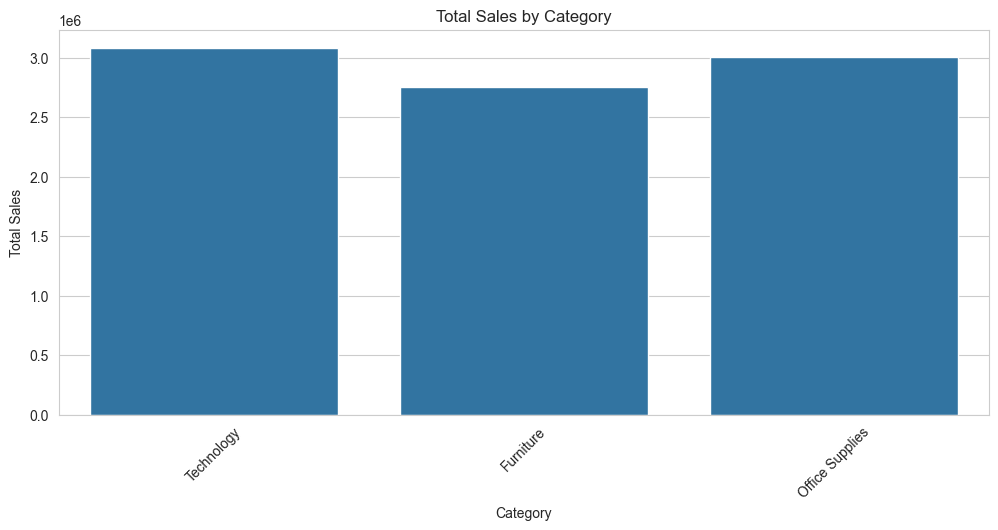

In [9]:
plt.figure(figsize=(12, 5))
sns.barplot(x=data['Category'], y=data['Sales'], estimator=sum, ci=None)
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Category")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Scatter Plot → Checks how discounts impact profit</h4>

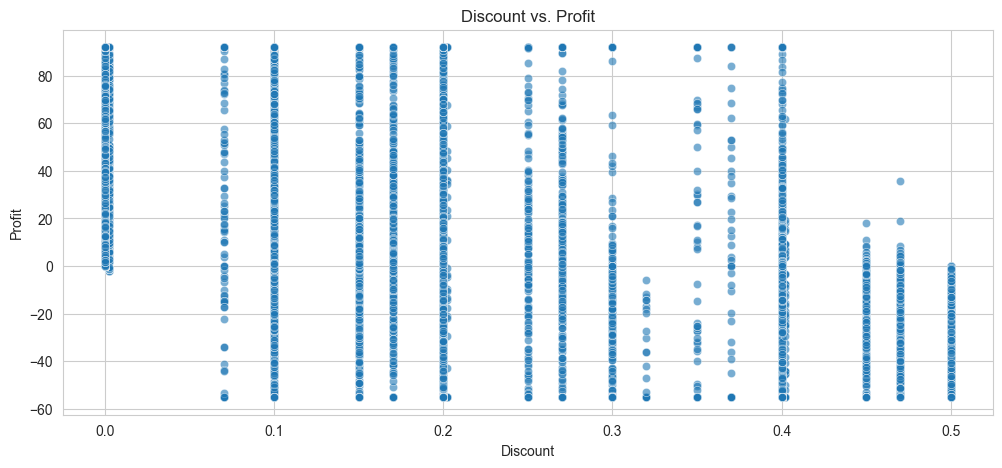

In [10]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=data['Discount'], y=data['Profit'], alpha=0.6)
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Discount vs. Profit")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Box Plot → Displays seasonal sales variations</h4>


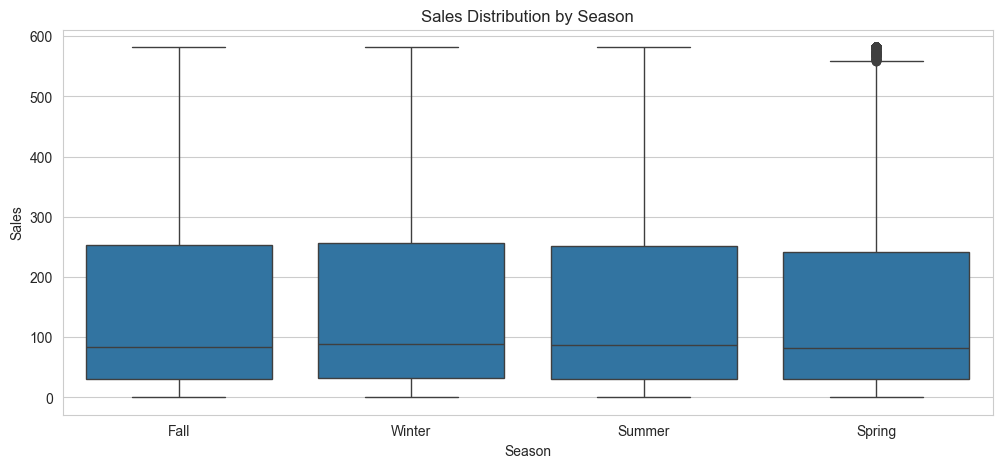

In [11]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=data['Season'], y=data['Sales'])
plt.xlabel("Season")
plt.ylabel("Sales")
plt.title("Sales Distribution by Season")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Box Plot → Displays Sales Distribution by Region</h4>


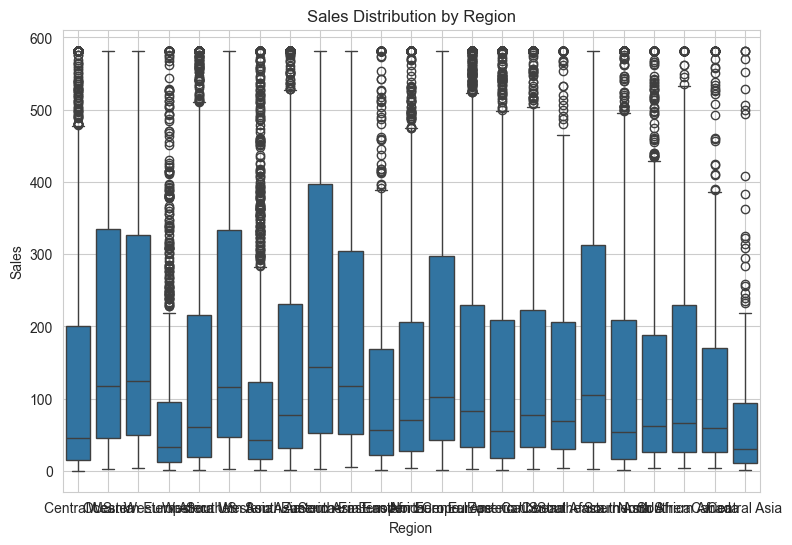

In [12]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=data, x='Region', y='Sales')
plt.title('Sales Distribution by Region')
plt.grid(True)
plt.show()


<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Compares total sales across different shipping modes</h4>


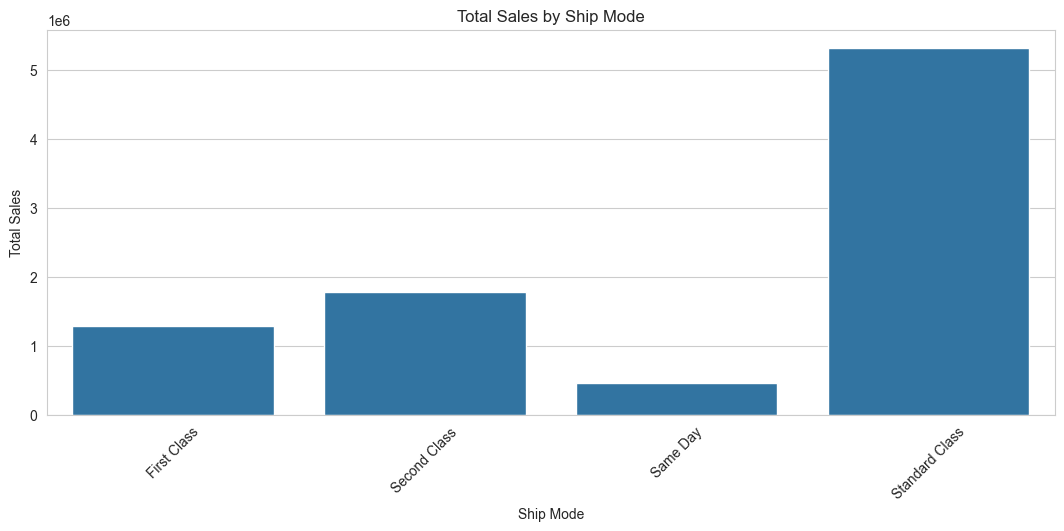

In [13]:
plt.figure(figsize=(13, 5))
sns.barplot(x=data['Ship Mode'], y=data['Sales'], estimator=sum, ci=None)
plt.xlabel("Ship Mode")
plt.ylabel("Total Sales")
plt.title("Total Sales by Ship Mode")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Scatter Plot → Analyzes the relationship between quantity sold and sales</h4>


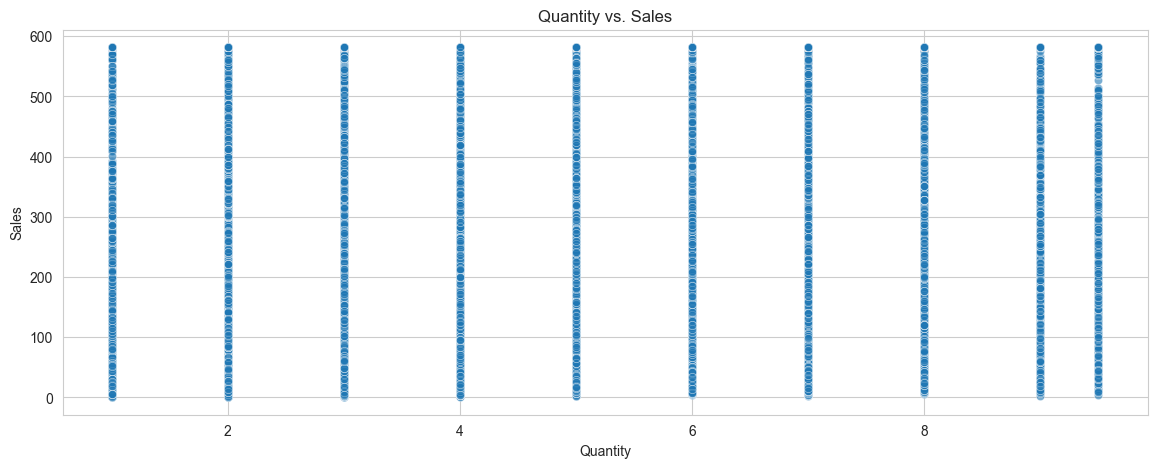

In [14]:
plt.figure(figsize=(14, 5))
sns.scatterplot(x=data['Quantity'], y=data['Sales'], alpha=0.6)
plt.xlabel("Quantity")
plt.ylabel("Sales")
plt.title("Quantity vs. Sales")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Compare profitability across product categories</h4>

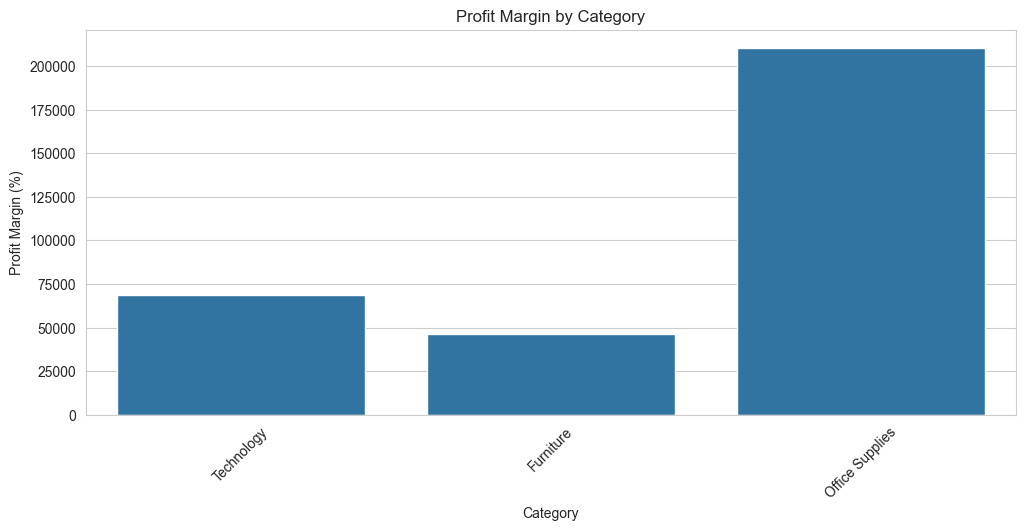

In [15]:
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100
plt.figure(figsize=(12, 5))
sns.barplot(x=data['Category'], y=data['Profit Margin'], estimator=sum, ci=None)
plt.xlabel("Category")
plt.ylabel("Profit Margin (%)")
plt.title("Profit Margin by Category")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Identify which customer segment contributes the most to sales</h4>


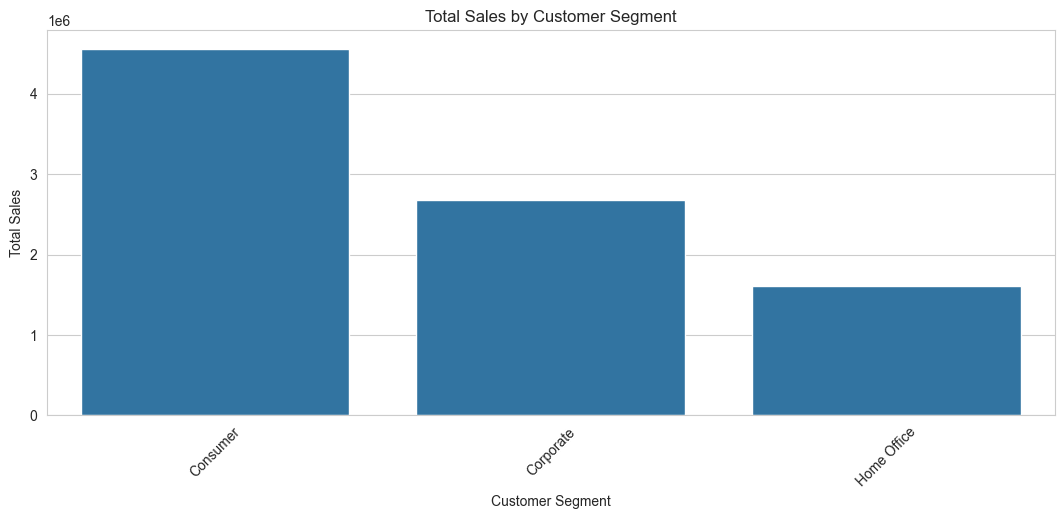

In [16]:
plt.figure(figsize=(13, 5))
sns.barplot(x=data['Segment'], y=data['Sales'], estimator=sum, ci=None)
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales")
plt.title("Total Sales by Customer Segment")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066;font-weight:bold">Scatter Plot → See how discounts impact total sales</h4>

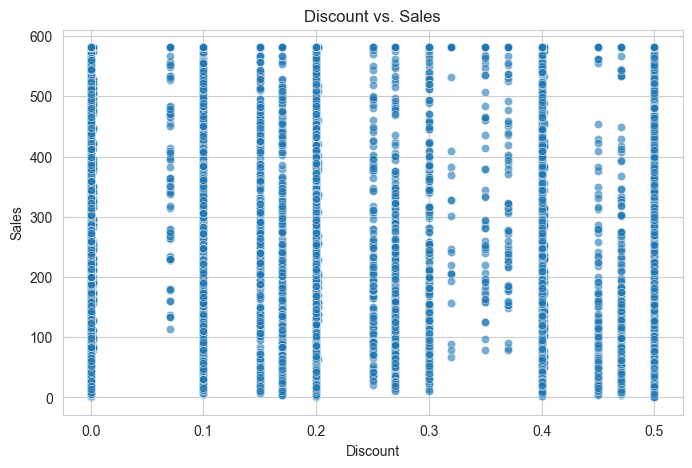

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Discount'], y=data['Sales'], alpha=0.6)
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.title("Discount vs. Sales")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Compare regional profitability</h4>

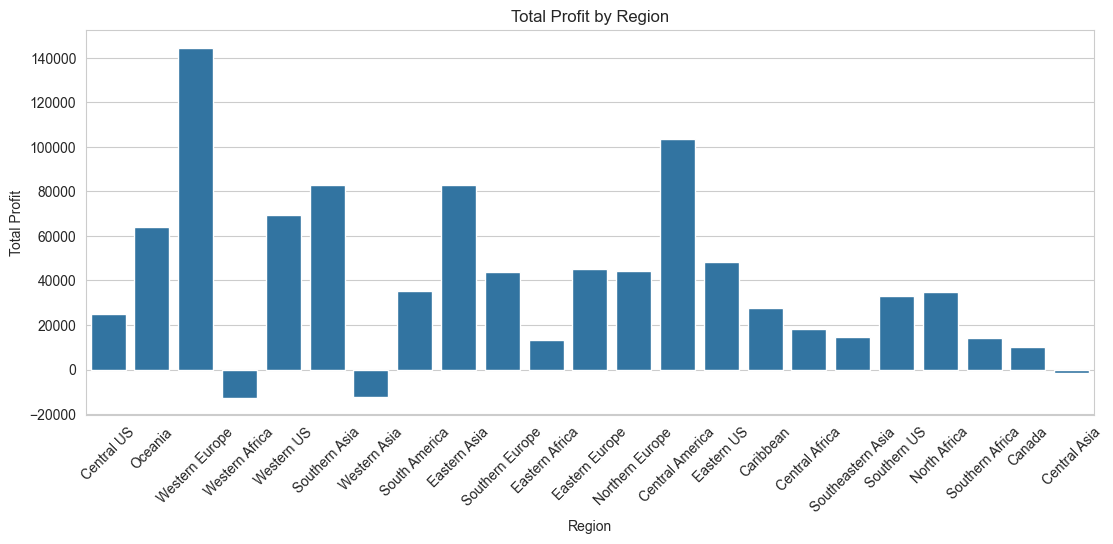

In [18]:
plt.figure(figsize=(13, 5))
sns.barplot(x=data['Region'], y=data['Profit'], estimator=sum, ci=None)
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.title("Total Profit by Region")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Heatmap: Average Sales by Discount and Profit Bins</h4>

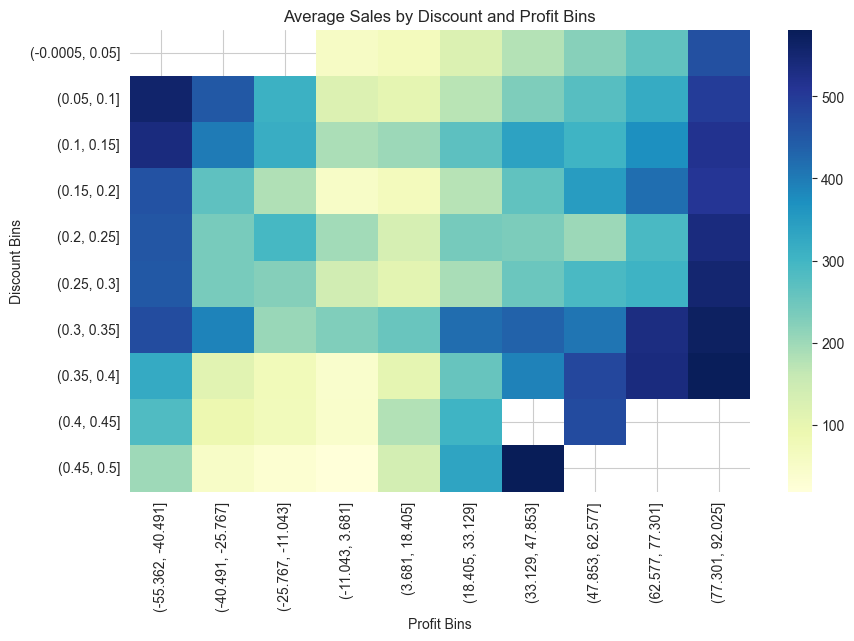

In [19]:
heatmap_data = data.copy()
heatmap_data['Discount_bin'] = pd.cut(heatmap_data['Discount'], bins=10)
heatmap_data['Profit_bin'] = pd.cut(heatmap_data['Profit'], bins=10)
pivot = heatmap_data.pivot_table(values='Sales', index='Discount_bin', columns='Profit_bin', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Average Sales by Discount and Profit Bins')
plt.xlabel('Profit Bins')
plt.ylabel('Discount Bins')
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Histogram → Understand the frequency of order sizes</h4>

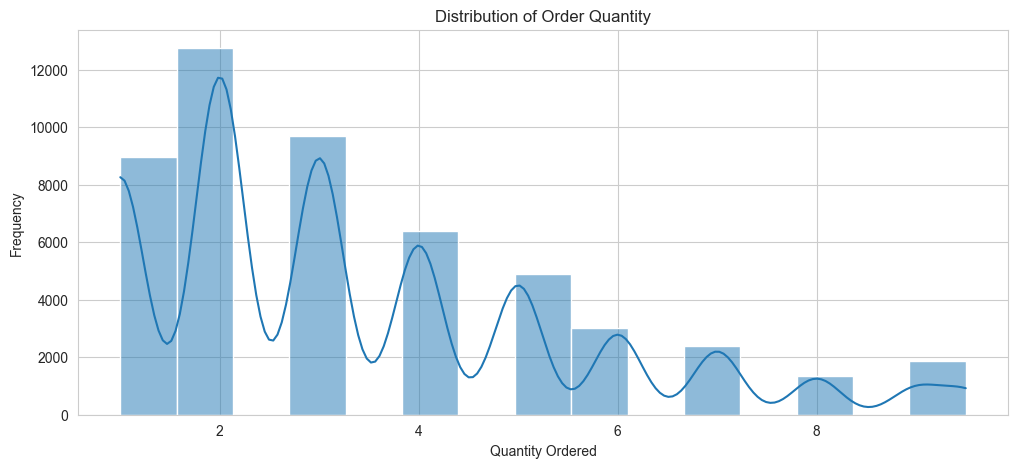

In [20]:
plt.figure(figsize=(12, 5))
sns.histplot(data['Quantity'], bins=15, kde=True)
plt.xlabel("Quantity Ordered")
plt.ylabel("Frequency")
plt.title("Distribution of Order Quantity")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Scatter Plot → Determine if higher shipping costs relate to higher sales</h4>

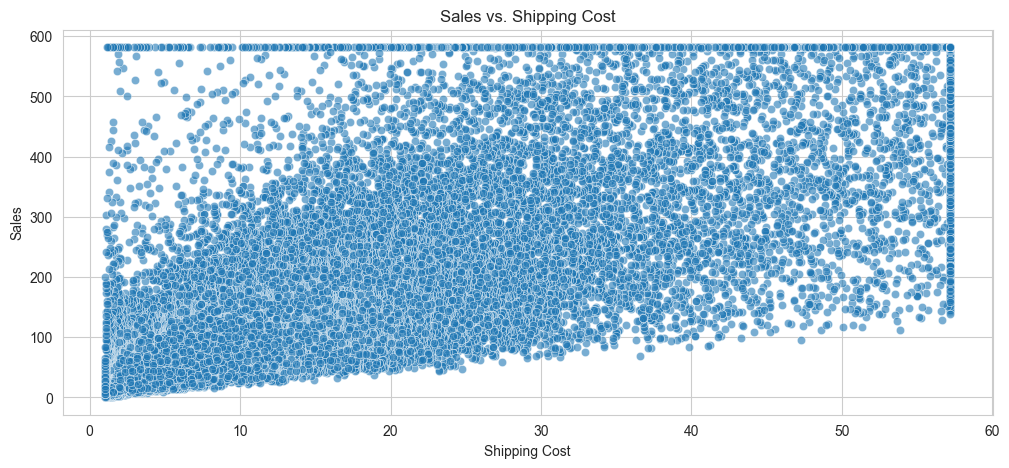

In [21]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=data['Shipping Cost'], y=data['Sales'], alpha=0.6)
plt.xlabel("Shipping Cost")
plt.ylabel("Sales")
plt.title("Sales vs. Shipping Cost")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Pie Chart → If payment mode data exists, compare payment preferences</h4>


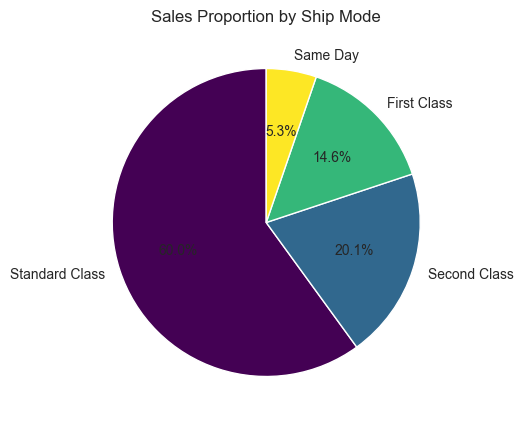

In [22]:
plt.figure(figsize=(12, 5))
data['Ship Mode'].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, cmap="viridis")
plt.ylabel("")
plt.title("Sales Proportion by Ship Mode")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Identify the most valuable customers</h4>

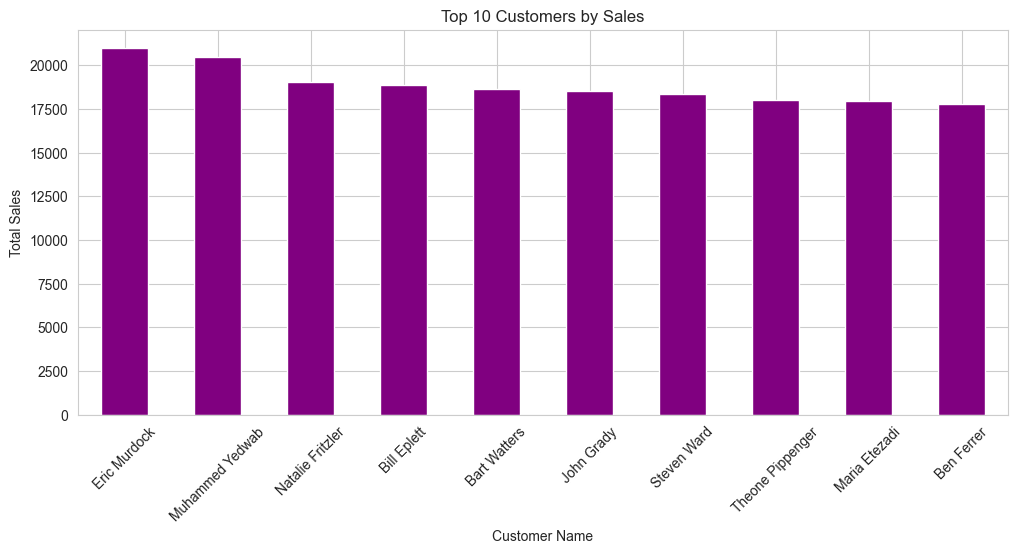

In [23]:
top_customers = data.groupby('Customer Name')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12, 5))
top_customers.plot(kind="bar", color="purple")
plt.xlabel("Customer Name")
plt.ylabel("Total Sales")
plt.title("Top 10 Customers by Sales")
plt.xticks(rotation=45)
plt.show()